Assignment 5

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
dataset_url = "/content/Mall_Customers.csv"
df = pd.read_csv(dataset_url)

In [4]:
print(df.shape)
print(df.info())
print(df.head())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(df.describe())
print(df['Annual Income (k$)'].value_counts())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64


In [7]:
df.dropna(inplace=True)

In [45]:
df.drop_duplicates(inplace=True)

In [44]:
df['column'] = df['Age'] * df['Spending Score (1-100)']

In [43]:

from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Age', 'Spending Score (1-100)']]), columns=['scaled_feature1', 'scaled_feature2'])
df = pd.concat([df, df_scaled], axis=1)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),column,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2
0,1,Male,19,15,39,741,0.019231,0.387755,0.019231,0.387755,0.019231,0.387755,0.019231,0.387755
1,2,Male,21,15,81,1701,0.057692,0.816327,0.057692,0.816327,0.057692,0.816327,0.057692,0.816327
2,3,Female,20,16,6,120,0.038462,0.051020,0.038462,0.051020,0.038462,0.051020,0.038462,0.051020
3,4,Female,23,16,77,1771,0.096154,0.775510,0.096154,0.775510,0.096154,0.775510,0.096154,0.775510
4,5,Female,31,17,40,1240,0.250000,0.397959,0.250000,0.397959,0.250000,0.397959,0.250000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2765,0.326923,0.795918,0.326923,0.795918,0.326923,0.795918,0.326923,0.795918
196,197,Female,45,126,28,1260,0.519231,0.275510,0.519231,0.275510,0.519231,0.275510,0.519231,0.275510
197,198,Male,32,126,74,2368,0.269231,0.744898,0.269231,0.744898,0.269231,0.744898,0.269231,0.744898
198,199,Male,32,137,18,576,0.269231,0.173469,0.269231,0.173469,0.269231,0.173469,0.269231,0.173469


In [24]:
df_scaled

,scaled_feature1,scaled_feature2
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
...,...,...
195,0.326923,0.795918
196,0.519231,0.275510
197,0.269231,0.744898
198,0.269231,0.173469


In [42]:
from scipy import stats

In [21]:
z_scores = np.abs(stats.zscore(df[['Age', 'Spending Score (1-100)']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
df_no_outliers
z_scores

,Age,Spending Score (1-100)
0,1.424569,0.434801
1,1.281035,1.195704
2,1.352802,1.715913
3,1.137502,1.040418
4,0.563369,0.395980
...,...,...
195,0.276302,1.118061
196,0.441365,0.861839
197,0.491602,0.923953
198,0.491602,1.250054


In [22]:
df_no_outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),column,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2
0,1,Male,19,15,39,741,0.019231,0.387755,0.019231,0.387755,0.019231,0.387755
1,2,Male,21,15,81,1701,0.057692,0.816327,0.057692,0.816327,0.057692,0.816327
2,3,Female,20,16,6,120,0.038462,0.051020,0.038462,0.051020,0.038462,0.051020
3,4,Female,23,16,77,1771,0.096154,0.775510,0.096154,0.775510,0.096154,0.775510
4,5,Female,31,17,40,1240,0.250000,0.397959,0.250000,0.397959,0.250000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2765,0.326923,0.795918,0.326923,0.795918,0.326923,0.795918
196,197,Female,45,126,28,1260,0.519231,0.275510,0.519231,0.275510,0.519231,0.275510
197,198,Male,32,126,74,2368,0.269231,0.744898,0.269231,0.744898,0.269231,0.744898
198,199,Male,32,137,18,576,0.269231,0.173469,0.269231,0.173469,0.269231,0.173469


In [26]:
print("Original data shape:", df.shape)
print("Data shape after handling outliers:", df_no_outliers.shape)

Original data shape: (200, 14)
Data shape after handling outliers: (200, 12)


In [30]:

df = df[df['CustomerID'] != 'unacceptable_value']
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),column,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2
0,1,Male,19,15,39,741,0.019231,0.387755,0.019231,0.387755,0.019231,0.387755,0.019231,0.387755
1,2,Male,21,15,81,1701,0.057692,0.816327,0.057692,0.816327,0.057692,0.816327,0.057692,0.816327
2,3,Female,20,16,6,120,0.038462,0.051020,0.038462,0.051020,0.038462,0.051020,0.038462,0.051020
3,4,Female,23,16,77,1771,0.096154,0.775510,0.096154,0.775510,0.096154,0.775510,0.096154,0.775510
4,5,Female,31,17,40,1240,0.250000,0.397959,0.250000,0.397959,0.250000,0.397959,0.250000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2765,0.326923,0.795918,0.326923,0.795918,0.326923,0.795918,0.326923,0.795918
196,197,Female,45,126,28,1260,0.519231,0.275510,0.519231,0.275510,0.519231,0.275510,0.519231,0.275510
197,198,Male,32,126,74,2368,0.269231,0.744898,0.269231,0.744898,0.269231,0.744898,0.269231,0.744898
198,199,Male,32,137,18,576,0.269231,0.173469,0.269231,0.173469,0.269231,0.173469,0.269231,0.173469


In [41]:

df['new_binary_feature'] = df['Age'] > df['Age'].mean()


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [40]:

from scipy.stats import zscore

z_scores = zscore(df[['Annual Income (k$)', 'Spending Score (1-100)']])
outliers = (z_scores > 3) | (z_scores < -3)
df_outliers = df.mean()
df_outliers

<ipython-input-40-6563b845eefc>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_outliers = df.mean()


CustomerID                1.005000e+02
Age                       3.885000e+01
Annual Income (k$)       -2.131628e-16
Spending Score (1-100)   -1.465494e-16
column                    1.832820e+03
scaled_feature1           4.009615e-01
scaled_feature2           5.020408e-01
scaled_feature1           4.009615e-01
scaled_feature2           5.020408e-01
scaled_feature1           4.009615e-01
scaled_feature2           5.020408e-01
scaled_feature1           4.009615e-01
scaled_feature2           5.020408e-01
new_binary_feature        4.350000e-01
dtype: float64

In [38]:
print("Original data shape:", df.shape)

Original data shape: (200, 15)


In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [48]:
selected_features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
selected_features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,-1.738999,-0.434801
1,21,-1.738999,1.195704
2,20,-1.700830,-1.715913
3,23,-1.700830,1.040418
4,31,-1.662660,-0.395980
...,...,...,...
195,35,2.268791,1.118061
196,45,2.497807,-0.861839
197,32,2.497807,0.923953
198,32,2.917671,-1.250054


In [50]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [52]:
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [53]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

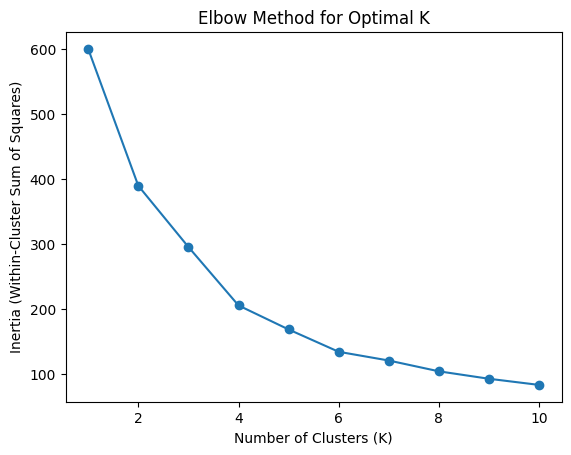

In [54]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [55]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sil_scores.append(silhouette_score(scaled_features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

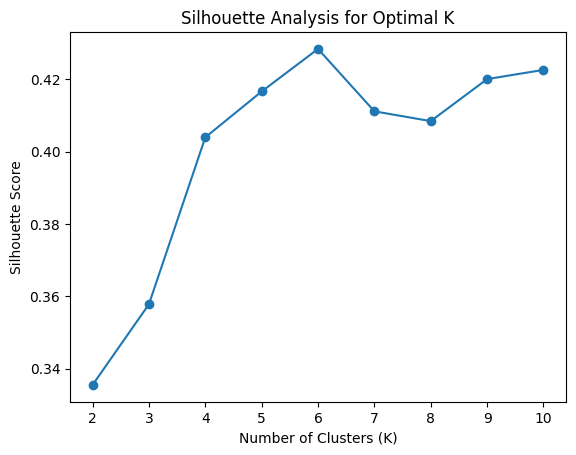

In [57]:
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [60]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
optimal_k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3

In [61]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [62]:
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [59]:
df['cluster'] = kmeans.labels_
df['cluster']

0      8
1      6
2      8
3      6
4      8
      ..
195    4
196    7
197    4
198    7
199    4
Name: cluster, Length: 200, dtype: int32

In [64]:

cluster_means = df.groupby('cluster').mean()
cluster_means

<ipython-input-64-b52dd425c32c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),column,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,scaled_feature1,scaled_feature2,new_binary_feature
cluster,,,,,,,,,,,,,,
0,145.000000,26.222222,0.576613,-1.435535,-38.071873,0.158120,0.124717,0.158120,0.124717,0.158120,0.124717,0.158120,0.124717,0.000000
1,85.066667,24.800000,-0.221128,0.019411,0.520468,0.130769,0.507143,0.130769,0.507143,0.130769,0.507143,0.130769,0.507143,0.000000
2,80.750000,64.850000,-0.282835,-0.013588,-0.948023,0.900962,0.498469,0.900962,0.498469,0.900962,0.498469,0.900962,0.498469,1.000000
3,86.750000,47.093750,-0.190752,-0.092686,-4.056125,0.559495,0.477679,0.559495,0.477679,0.559495,0.477679,0.559495,0.477679,0.906250
4,162.000000,32.692308,0.991583,1.239503,40.697936,0.282544,0.827839,0.282544,0.827839,0.282544,0.827839,0.282544,0.827839,0.102564
5,156.285714,51.285714,0.782910,-1.261146,-64.775438,0.640110,0.170554,0.640110,0.170554,0.640110,0.170554,0.640110,0.170554,1.000000
6,23.090909,25.272727,-1.329545,1.132178,28.773482,0.139860,0.799629,0.139860,0.799629,0.139860,0.799629,0.139860,0.799629,0.000000
7,184.076923,39.230769,1.631655,-1.154493,-45.110654,0.408284,0.198587,0.408284,0.198587,0.408284,0.198587,0.408284,0.198587,0.538462
8,18.272727,34.090909,-1.412824,-0.960657,-32.655991,0.309441,0.249536,0.309441,0.249536,0.309441,0.249536,0.309441,0.249536,0.272727


In [66]:
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_data

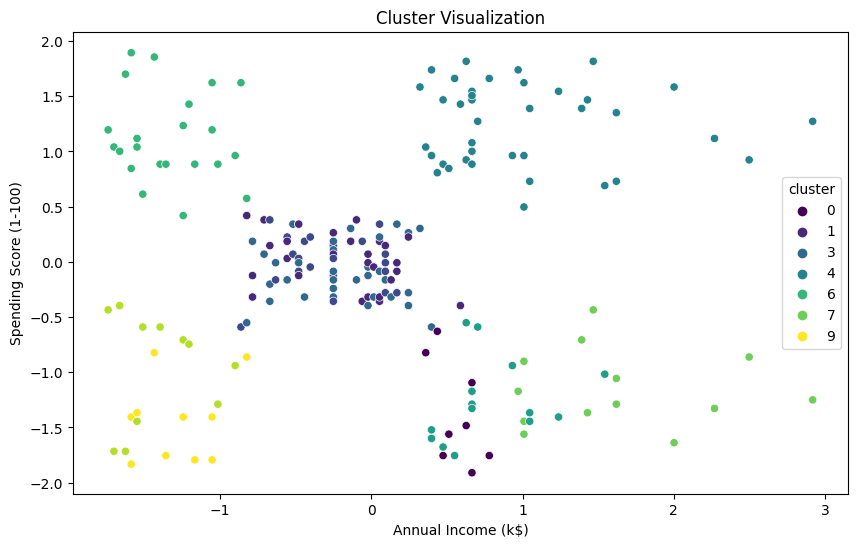

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df, palette='viridis')
plt.title('Cluster Visualization')
plt.show()

In [73]:
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_data

In [77]:
cluster_insights = {
        'Cluster': cluster_id,
        'Mean_Feature1': cluster_data['Age'].mean(),
        'Mean_Feature2': cluster_data['Annual Income (k$)'].mean(),
        'Total_Customers': len(cluster_data),
    }
cluster_insights

{'Cluster': 2,
 'Mean_Feature1': 64.85,
 'Mean_Feature2': -0.282835470162833,
 'Total_Customers': 20}

In [79]:
print(f"\nAdditional Insights for Cluster {cluster_id}:")
print(cluster_insights)


Additional Insights for Cluster 2:
{'Cluster': 2, 'Mean_Feature1': 64.85, 'Mean_Feature2': -0.282835470162833, 'Total_Customers': 20}


In [87]:
recommendations = []
if cluster_id == 0:
        recommendations.append("This cluster represents a group of high-value customers. Consider targeted marketing to retain and upsell.")
elif cluster_id == 1:
        recommendations.append("Customers in this cluster show interest in specific product categories. Tailor promotions accordingly.")

In [93]:

print("\nRecommendations:")
for recommendation in recommendations:
        print(f"- {recommendation}")


Recommendations:


In [94]:
overall_insights = {
    'Total_Customers': len(df),
    'Mean_Feature1': df['Age'].mean(),
    'Mean_Feature2': df['Annual Income (k$)'].mean(),
}

print("\nOverall Insights:")
print(overall_insights)


Overall Insights:
{'Total_Customers': 200, 'Mean_Feature1': 38.85, 'Mean_Feature2': 7.105427357601002e-17}


In [95]:
overall_recommendations = [
    "Explore partnerships with brands/products popular among the majority of customers.",
    "Consider optimizing store layouts based on common preferences observed in the clusters.",
]

In [96]:
print("\nOverall Recommendations:")
for recommendation in overall_recommendations:
    print(f"- {recommendation}")


Overall Recommendations:
- Explore partnerships with brands/products popular among the majority of customers.
- Consider optimizing store layouts based on common preferences observed in the clusters.


In [72]:
# Report
print(f"Optimal number of clusters (K): {optimal_k}")
print("Cluster Means:")
print(cluster_means)

Optimal number of clusters (K): 3
Cluster Means:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
cluster                                                                      
0        145.000000  26.222222            0.576613               -1.435535   
1         85.066667  24.800000           -0.221128                0.019411   
2         80.750000  64.850000           -0.282835               -0.013588   
3         86.750000  47.093750           -0.190752               -0.092686   
4        162.000000  32.692308            0.991583                1.239503   
5        156.285714  51.285714            0.782910               -1.261146   
6         23.090909  25.272727           -1.329545                1.132178   
7        184.076923  39.230769            1.631655               -1.154493   
8         18.272727  34.090909           -1.412824               -0.960657   
9         24.400000  55.200000           -1.284783               -1.444162   

            co

# All the required codes for Assignment 5

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Inco

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

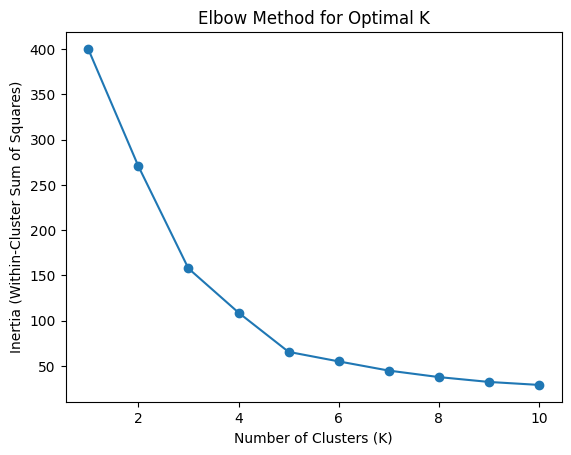

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

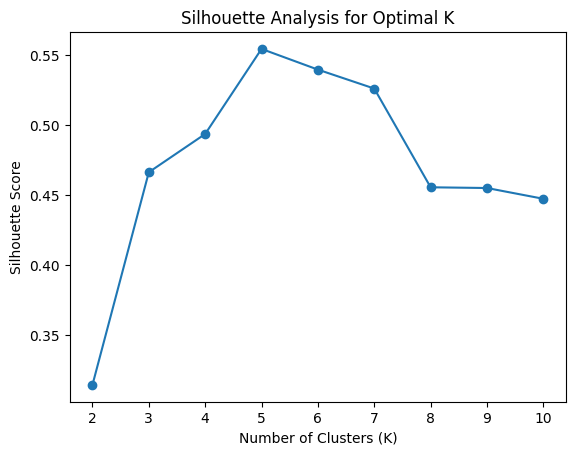

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-101-e6001476550b>:102: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()



Cluster 0 Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  123.000000  123.000000          123.000000              123.000000   
mean    62.000000   40.325203           44.154472               49.829268   
std     35.651087   16.113580           16.037882               19.694265   
min      1.000000   18.000000           15.000000                3.000000   
25%     31.500000   24.500000           30.000000               42.000000   
50%     62.000000   38.000000           46.000000               50.000000   
75%     92.500000   51.500000           59.500000               58.500000   
max    123.000000   70.000000           69.000000               99.000000   

       new_feature  scaled_income  scaled_spending  cluster  
count   123.000000     123.000000       123.000000    123.0  
mean   2197.357724      -0.626190        -0.014392      0.0  
std     972.066821       0.612157         0.764562      0.0  
min      57.000000      -1.738999     

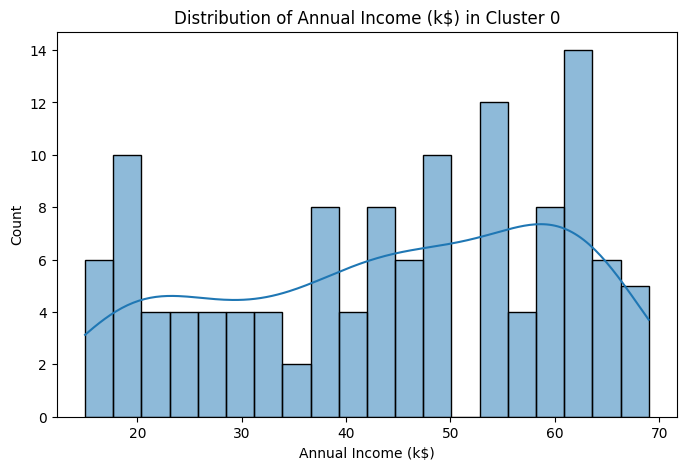

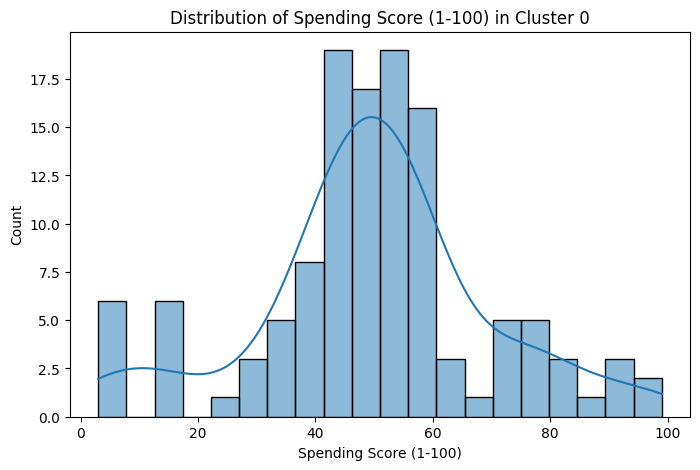


Cluster 1 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   38.000000  38.000000           38.000000               38.000000   
mean   162.000000  40.394737           87.000000               18.631579   
std     22.226111  11.376931           16.271348               10.915947   
min    125.000000  19.000000           70.000000                1.000000   
25%    143.500000  34.000000           76.250000               10.250000   
50%    162.000000  41.500000           80.000000               16.500000   
75%    180.500000  47.000000           96.000000               26.750000   
max    199.000000  59.000000          137.000000               40.000000   

       new_feature  scaled_income  scaled_spending  cluster  
count    38.000000      38.000000        38.000000     38.0  
mean   1634.973684       1.009200        -1.225535      1.0  
std     980.022738       0.621068         0.423774      0.0  
min      78.000000       0.360319        -1.910

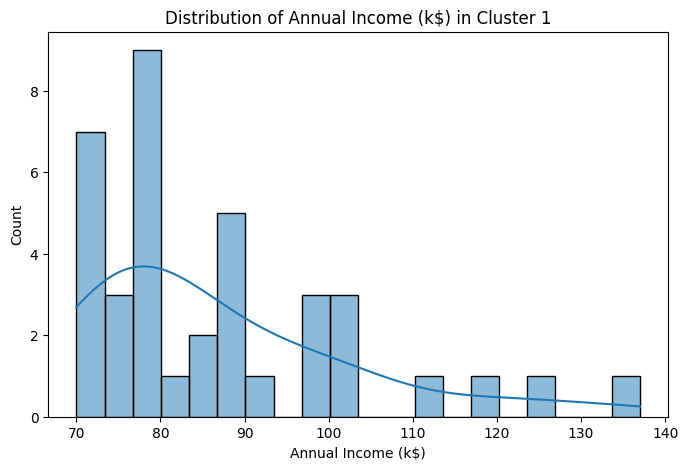

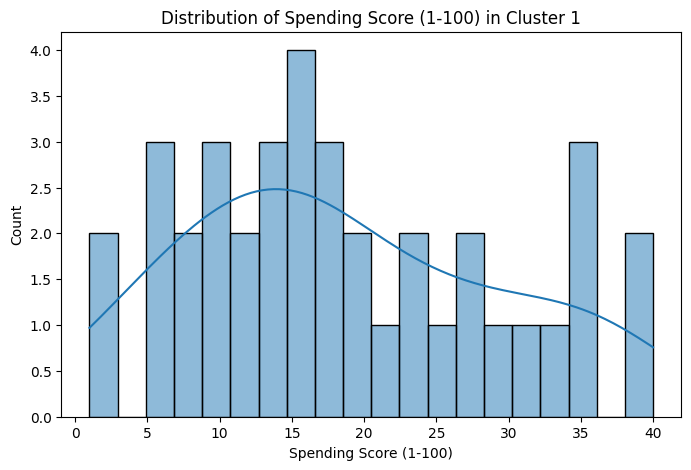


Cluster 2 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.000000               39.000000   
mean   162.000000  32.692308           86.538462               82.128205   
std     22.803509   3.728650           16.312485                9.364489   
min    124.000000  27.000000           69.000000               63.000000   
25%    143.000000  30.000000           75.500000               74.500000   
50%    162.000000  32.000000           79.000000               83.000000   
75%    181.000000  35.500000           95.000000               90.000000   
max    200.000000  40.000000          137.000000               97.000000   

        new_feature  scaled_income  scaled_spending  cluster  
count     39.000000      39.000000        39.000000     39.0  
mean    7101.410256       0.991583         1.239503      2.0  
std     1523.960210       0.622638         0.363544      0.0  
min     5112.000000       0.322150         

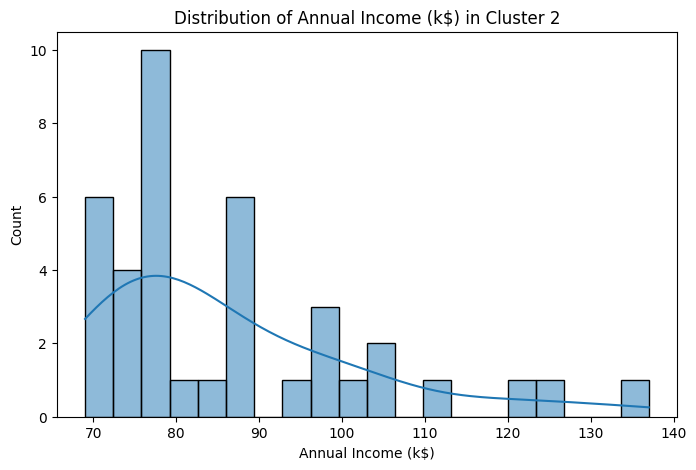

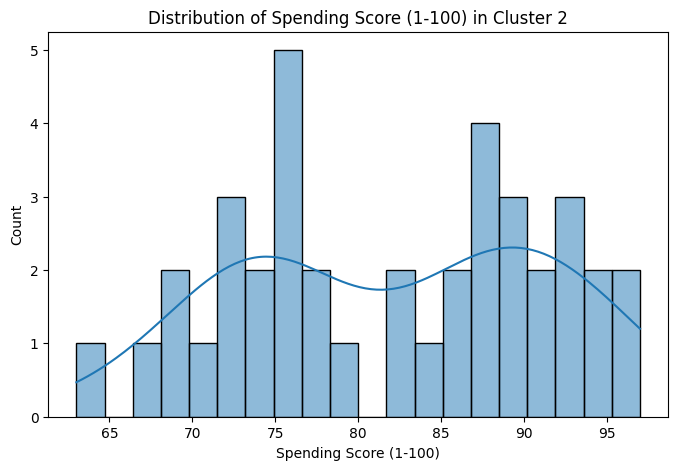


Additional Insights for Cluster 0:
{'Cluster': 0, 'Mean_Annual_Income': 44.15447154471545, 'Mean_Spending_Score': 49.829268292682926, 'Total_Customers': 123}

Recommendations:
- This cluster represents a group of high-value customers. Consider targeted marketing to retain and upsell.

Additional Insights for Cluster 1:
{'Cluster': 1, 'Mean_Annual_Income': 87.0, 'Mean_Spending_Score': 18.63157894736842, 'Total_Customers': 38}

Recommendations:
- Customers in this cluster show interest in specific product categories. Tailor promotions accordingly.

Additional Insights for Cluster 2:
{'Cluster': 2, 'Mean_Annual_Income': 86.53846153846153, 'Mean_Spending_Score': 82.12820512820512, 'Total_Customers': 39}

Recommendations:

Overall Insights:
{'Total_Customers': 200, 'Mean_Annual_Income': 60.56, 'Mean_Spending_Score': 50.2}

Overall Recommendations:
- Explore partnerships with brands/products popular among the majority of customers.
- Consider optimizing store layouts based on common prefere

In [101]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
dataset_url = "/content/Mall_Customers.csv"
df = pd.read_csv(dataset_url)
df

# Explore the dataset
print(df.shape)
print(df.info())
print(df.head())

# Understand Columns
print(df.describe())
print(df['Age'].value_counts())

# Handle Missing Data
df.dropna(inplace=True)  # or use imputation strategies

# Data Cleaning
# Example: Removing duplicates
df.drop_duplicates(inplace=True)

# Feature Engineering
# Example: Creating a new feature based on existing ones
df['new_feature'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']

# Normalization/Scaling
# Example: Min-Max Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']]), columns=['scaled_income', 'scaled_spending'])
df_scaled
df = pd.concat([df, df_scaled], axis=1)
df

# Outlier Detection and Handling
# Example: Identify and remove outliers using Z-score
z_scores = np.abs(zscore(df[['Annual Income (k$)', 'Spending Score (1-100)']]))
z_scores
df_no_outliers = df[(z_scores < 3).all(axis=1)]
df_no_outliers

# Clustering Analysis
# Feature Selection
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
selected_features

# Normalization/Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
scaled_features

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

# Silhouette Analysis
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sil_score = silhouette_score(scaled_features, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal K and retrain the model
optimal_k = 3  # Choose based on the analysis from the elbow method and silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans
kmeans.fit(scaled_features)

# Cluster Assignment
df['cluster'] = kmeans.labels_
df['cluster']

# Analysis and Interpretation
# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster').mean()
cluster_means

# Extract insights and patterns from each cluster
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_data

    # Display summary statistics for each cluster
    print(f"\nCluster {cluster_id} Summary:")
    print(cluster_data.describe())

    # Explore feature distributions within each cluster
    for column in selected_features.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(cluster_data[column], bins=20, kde=True)
        plt.title(f'Distribution of {column} in Cluster {cluster_id}')
        plt.show()

# Additional insights and recommendations based on the analysis
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_data

    # Identify key characteristics or patterns in each cluster
    cluster_insights = {
        'Cluster': cluster_id,
        'Mean_Annual_Income': cluster_data['Annual Income (k$)'].mean(),
        'Mean_Spending_Score': cluster_data['Spending Score (1-100)'].mean(),
        'Total_Customers': len(cluster_data),
        # Add more insights as needed
    }

    print(f"\nAdditional Insights for Cluster {cluster_id}:")
    print(cluster_insights)

    # Provide recommendations based on the cluster analysis
    recommendations = []
    if cluster_id == 0:
        recommendations.append("This cluster represents a group of high-value customers. Consider targeted marketing to retain and upsell.")
    elif cluster_id == 1:
        recommendations.append("Customers in this cluster show interest in specific product categories. Tailor promotions accordingly.")
    # Add more recommendations based on your analysis

    print("\nRecommendations:")
    for recommendation in recommendations:
        print(f"- {recommendation}")

# General summary or overarching recommendations based on the overall analysis
overall_insights = {
    'Total_Customers': len(df),
    'Mean_Annual_Income': df['Annual Income (k$)'].mean(),
    'Mean_Spending_Score': df['Spending Score (1-100)'].mean(),
    # Add more overall insights as needed
}

print("\nOverall Insights:")
print(overall_insights)

# General recommendations based on the overall analysis
overall_recommendations = [
    "Explore partnerships with brands/products popular among the majority of customers.",
    "Consider optimizing store layouts based on common preferences observed in the clusters.",
    # Add more general recommendations
]

print("\nOverall Recommendations:")
for recommendation in overall_recommendations:
    print(f"- {recommendation}")
